In [30]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [31]:
sourcedata = '../SourceData/Salary Data.csv'
df = pd.read_csv(sourcedata)
print(df.head(10))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [32]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [33]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [35]:
from sklearn.linear_model  import LinearRegression
#reg = RandomForestRegressor(max_depth=2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [47]:
df[df['YearsExperience']>=9]

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [49]:
reg.predict([[10]])

array([119905.85041792])

In [37]:
reg.score(X_train,y_train)

0.9411949620562126

In [38]:
#Check Model Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_rand_score
import numpy as np
score_r2 =r2_score(y_test,y_pred)
score_m = mean_absolute_error(y_test,y_pred)
score_meansquare=mean_squared_error(y_test,y_pred)
score_rootmeansquared = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2",score_r2)
print("Mean Abs",score_m)
print("Mean Square",score_meansquare)
print("Root Mean Square",score_rootmeansquared)

R2 0.988169515729126
Mean Abs 2446.1723690465055
Mean Square 12823412.298126549
Root Mean Square 3580.979237321343


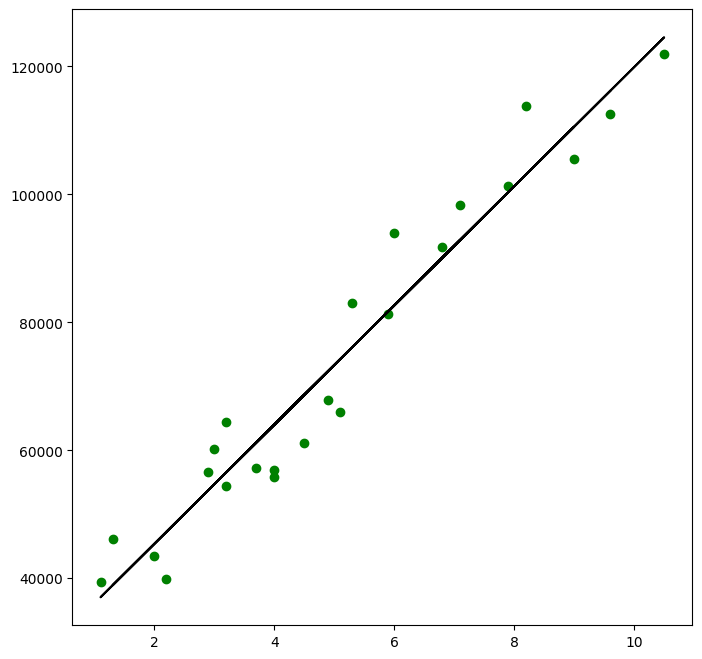

In [54]:
#Plot the Predicted and Actual values on training data
plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train,color='g')
plt.plot(X_train,reg.predict(X_train),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
#plt.xlim(0,10)
plt.show()

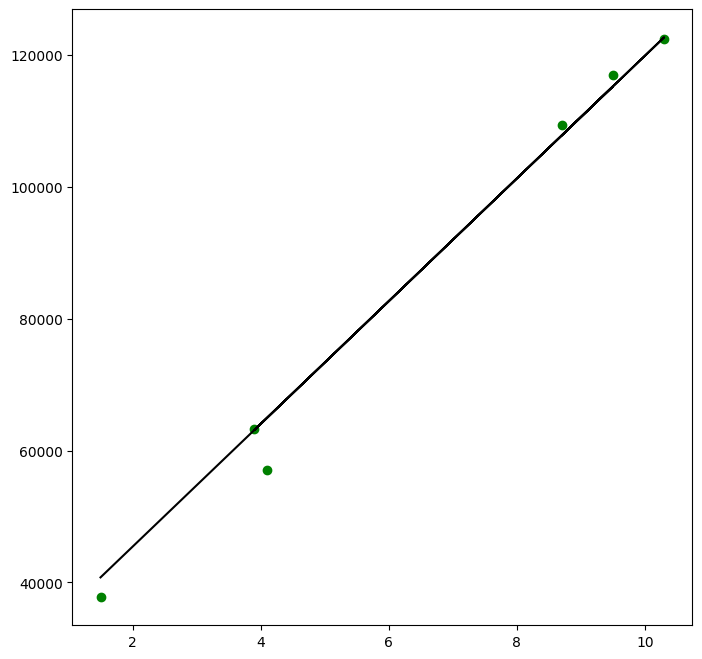

In [55]:
#Plot the Predicted and Actual values on test data
plt.figure(figsize=(8,8))
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test,reg.predict(X_test),color='k')
#plt.xticks(range(len(X_test)),df['X_test'],rotation=45,ha='right')
#plt.xlim(0,10)
plt.show()

In [56]:
range(len(y_test))

range(0, 6)

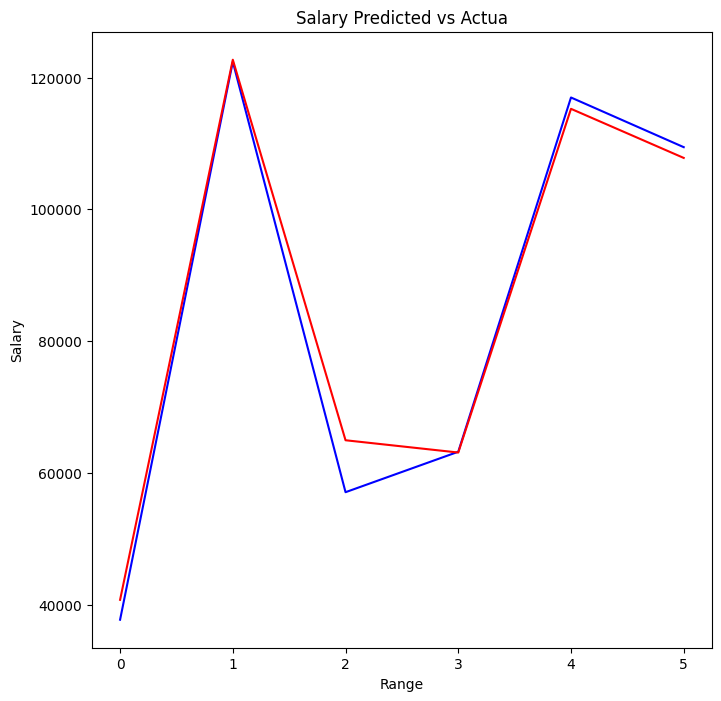

In [58]:
#Plot the Predicted vs Actual values on test data
plt.figure(figsize=(8,8))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.title('Salary Predicted vs Actua')
plt.xlabel('Range')
plt.ylabel('Salary')
plt.show()